In [2]:
import pandas as pd
df = pd.read_csv('milk_price_market_survey.csv')
df.head()

,gram,price
0,1350.0,180.0
1,1400.0,176.0
2,1250.0,140.0
3,750.0,93.0
4,900.0,135.0


<h3>Extract the features and the target variable</h3>

In [5]:
X = df[['gram']] 
y = df[['price']]


<h3>Split the Dataset into training and test set: 80/20</h3>

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

<h3>Model Training</h3>

In [10]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression() #MLR = multivariate linear regression
mlr.fit(X_train, y_train) #model training

p_1 = mlr.coef_[0]
p_0 = mlr.intercept_
print("p(g) = %.2fg + %.2f"%(p_1,p_0))


p(g) = 0.11g + 21.71


<h3>Visualing the regression line</h3>

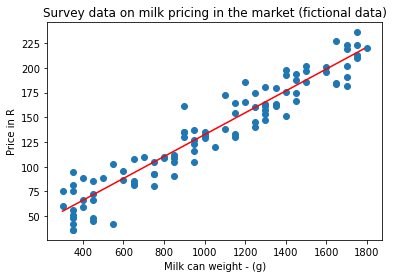

In [12]:
import matplotlib.pyplot as plt
import numpy as np

g_min = df['gram'].min()
g_max = df['gram'].max()
r_g = g_max-g_min
g_n = np.arange(g_min,g_max,step=r_g/100)
y_regr_n = g_n*p_1 + p_0 #regression function

plt.figure()
plt.scatter(df['gram'],df['price'])
plt.plot(g_n,y_regr_n,color="r")
plt.xlabel('Milk can weight - (g)')
plt.ylabel('Price in R')
plt.title('Survey data on milk pricing in the market (fictional data)')
plt.show()

<h3>Coefficient of Determination: R^2</h3>

$$R^2 = 1- \frac{SSE_{reg}}{SSE_{tot}}$$

$$SSE_{tot}  = \sum_{i=1}^{n}(y_{d_i}-\bar{y_d})^2$$

$$ SSE_{reg} = \sum_{i=1}^{n}(y_{d_i}-y_{p_i})^2$$

$$\bar{y_d} = \frac{1}{n}\sum_{i=1}^{n}y_{d_i}$$

$$-\infty < R^2 \leq 1$$

In [14]:
from sklearn.metrics import r2_score

y_pred_train = mlr.predict(X_train) #get model prediction on trainign data
r2_score_train = r2_score(y_train,y_pred_train)

y_pred_test = mlr.predict(X_test) #get model prediction on test data
r2_score_test = r2_score(y_test,y_pred_test)

print("r2_score-train: ",r2_score_train)
print("r2_score-test: ",r2_score_test)


r2_score-train:  0.9105743325791579
r2_score-test:  0.9191706611980854


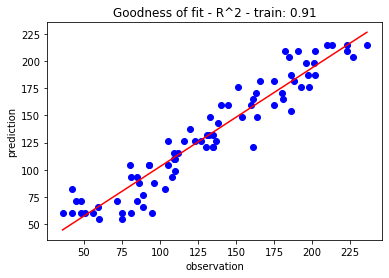

In [20]:
import numpy as np
y_1 = y_train.iloc[:,0]
a,b = np.polyfit(y_1, y_pred_train,1)
yp_1 = [a*y_1.min()+b,a*y_1.max()+b]

plt.figure()
plt.scatter(y_train,y_pred_train,color="blue")
plt.plot([y_1.min(), y_1.max()],yp_1,color="red")
plt.xlabel('observation')
plt.ylabel('prediction')
plt.title('Goodness of fit - R^2 - train: %.2f'%(r2_score_train))
plt.show()

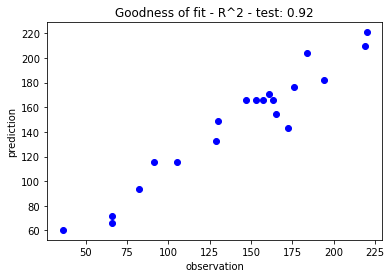

In [16]:
plt.figure()
plt.scatter(y_test,y_pred_test,color="blue")
plt.xlabel('observation')
plt.ylabel('prediction')
plt.title('Goodness of fit - R^2 - test: %.2f'%(r2_score_test))
plt.show()

<h3>How much will a milk can of 1.5Kg cost?</h3>

In [29]:
import warnings
warnings.filterwarnings('ignore')

feats = np.array([1500]).reshape(-1,1)
price = mlr.predict(feats)

print(f'A milk can of {feats[0][0]}g will cost R{price[0][0]}')

A milk can of 1500g will cost R187.7029101912379
